# Análise Exploratória de Dados em Reservas de Hotéis

## Introdução

Neste notebook, realizaremos uma análise exploratória de dados sobre um conjunto de dados de reservas de hotéis disponível no Kaggle. O objetivo principal é compreender o problema de negócio associado às reservas de hotéis e identificar os elementos cruciais para o planejamento de um modelo de Data Science eficaz.

### Objetivos Gerais:
- Entender o problema de negócio e identificar os elementos relevantes para o planejamento do modelo de Data Science.
- Descrever os dados de negócio e as relações entre eles por meio de uma Análise Exploratória de Dados.
- Construir uma apresentação executiva para a alta gerência, apresentando os resultados obtidos.

### Objetivos Específicos:
- Desenvolver instâncias de Aquisição de Dados e Data Wrangling.
- Articular em equipe e dividir tarefas adequadas aos objetivos.
- Realizar filtragem dos dados.
- Descrever o significado de cada variável e seu comportamento.
- Especificar as distribuições e relações entre as variáveis.

Vamos começar explorando os dados e entendendo melhor o contexto das reservas de hotéis.


Aqui está uma apresentação executiva dos pontos levantados durante a análise exploratória:  
[Slides](https://docs.google.com/presentation/d/1ukRjHGNY2FE7x1v_jDXxzvSD87QrJaCfOChBUW-GNJY/edit?usp=sharing)

Dicionário de Dados:

* Booking_ID: identificador único de cada reserva
* no_of_adults: número de adultos
* no_of_children: número de crianças
* no_of_weekend_nights: número de noites de fim de semana (sábado ou domingo) que o hóspede ficou ou reservou para ficar no hotel
* no_of_week_nights: número de noites de semana (de segunda a sexta-feira) que o hóspede ficou ou reservou para ficar no hotel
* type_of_meal_plan: tipo de plano de refeições reservado pelo cliente
* required_car_parking_space: o cliente requer uma vaga de estacionamento? (0 - Não, 1 - Sim)
* room_type_reserved: tipo de quarto reservado pelo cliente
* lead_time: número de dias entre a data da reserva e a data de chegada
* arrival_year: ano da data de chegada
* arrival_month: mês da data de chegada
* arrival_date: dia do mês
* market_segment_type: designação do segmento de mercado
* repeated_guest: o cliente é um hóspede repetido? (0 - Não, 1 - Sim)
* no_of_previous_cancellations: número de reservas anteriores canceladas pelo cliente antes da reserva atual
* no_of_previous_bookings_not_canceled: número de reservas anteriores não canceladas pelo cliente antes da reserva atual
* avg_price_per_room: preço médio por dia da reserva (em euros)
* no_of_special_requests: número total de pedidos especiais feitos pelo cliente
* booking_status: indica se a reserva foi cancelada ou não.

## Importação das bibliotecas utilizadas

In [1]:
# Processamento de dados, carregamento de arquivos 
import numpy as np 
import pandas as pd 

# Visualização dos dados
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('bmh')

# EDA Automatizada
import sweetviz as sv

c:\Users\mcemi\Documents\Coderhouse\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Wrangling

Carregue os dados em um DataFrame do pandas para manipulação, exploração e visualização.

In [2]:
df=pd.read_csv('../Data/Hotel Reservations.csv', sep=',')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
'''
Vamos começar eliminando a coluna Booking_ID
'''
df = df.drop(columns = ['Booking_ID'])

In [4]:
'''
O método ".info()" nos permite ver o número de colunas, os nomes das colunas, as contagens não nulas e o tipo de dados 
de cada recurso no conjunto de dados. Esta é uma ferramenta útil para obter uma compreensão de alto nível dos dados 
com os quais você está trabalhando.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [5]:
'''
A partir da visualização anterior (_info()_), sabemos que temos dados categóricos armazenados como objetos (strings em Python).
Precisaremos encontrar uma maneira de codificar esses dados adequadamente.

Vamos começar olhando para os valores únicos de todas as colunas que contêm dados do tipo objeto.
'''
df.type_of_meal_plan.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [6]:
df.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [7]:
df.market_segment_type.unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [8]:
df.booking_status.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

Podemos observar que as colunas type_of_meal_plan, room_type_reserved e market_segment_type contêm dados categóricos que não têm uma relação clara entre si (se tivéssemos mais informações sobre o significado desses rótulos, poderíamos ter mais opções disponíveis, mas esse não é o caso deste conjunto de dados).  
A aplicação de métodos de codificação de rótulos (_label encoding_), que é a prática de transformar cada categoria em um rótulo inteiro, não é a melhor prática aqui, pois não há informações sobre a relação entre as categorias. Esta técnica funciona bem quando as categorias têm relacionamentos, como baixo, médio e alto, onde a máquina pode então determinar uma relação entre rótulos inteiros mais altos e mais baixos (ex.: Faixa etária, nível de salário, .....).   
Para as colunas categóricas em nosso conjunto de dados, temos algumas opções. Podemos descartá-las completamente, realizar mais engenharia de recursos e extração, ou podemos realizar a codificação One-Hot.  
Neste notebook, estaremos usando a técnica de _One-Hot Encoding_, mas esteja ciente de que a dimensionalidade do conjunto de dados aumenta com o número N de categorias. Por exemplo, se houver 10 categorias em uma coluna, após a aplicação de _One-Hot Encoding_ haverá 10 colunas no total representando esse recurso. Se isso apresentar um problema com os dados que você possui, tente outro método. Além disso, a coluna original pode ser descartada.  
A codificação One-Hot é realizada usando o método `get_dummies()` no Pandas. O conjunto de dados transformado é visualizado.

In [9]:
transformedDf = pd.get_dummies(df, columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
transformedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

Observe que as características categóricas agora estão codificadas usando _One-Hot Encoding_ e que a forma do conjunto de dados aumentou de 18 colunas para 31 colunas.

Em seguida, use a codificação de rótulos (_Label Encoding_) para o rótulo alvo. Isso converte a sequência de caracteres em cada classe para nossa tarefa de classificação binária.

In [10]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
transformedDf['booking_status'] = label_encoder.fit_transform(transformedDf['booking_status']) 

transformedDf.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


## Visualização dos dados

O Sweetviz é uma ferramenta de análise exploratória de dados (EDA) que permite criar relatórios detalhados e interativos sobre conjuntos de dados de forma rápida e fácil. Ele oferece visualizações abrangentes e estatísticas descritivas que ajudam os usuários a entender melhor a distribuição dos dados, identificar padrões, relações entre variáveis e detectar anomalias. O Sweetviz é útil para análises iniciais de dados, especialmente para análises exploratórias rápidas e geração de relatórios automatizados.

In [14]:
datareport = sv.analyze(transformedDf)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report edaReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



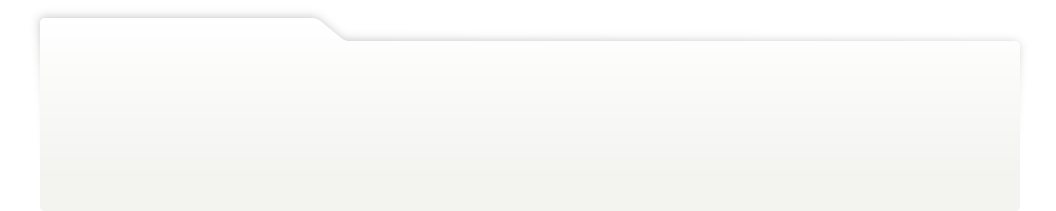
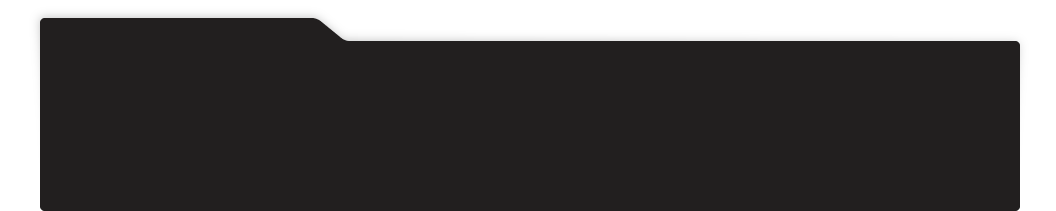
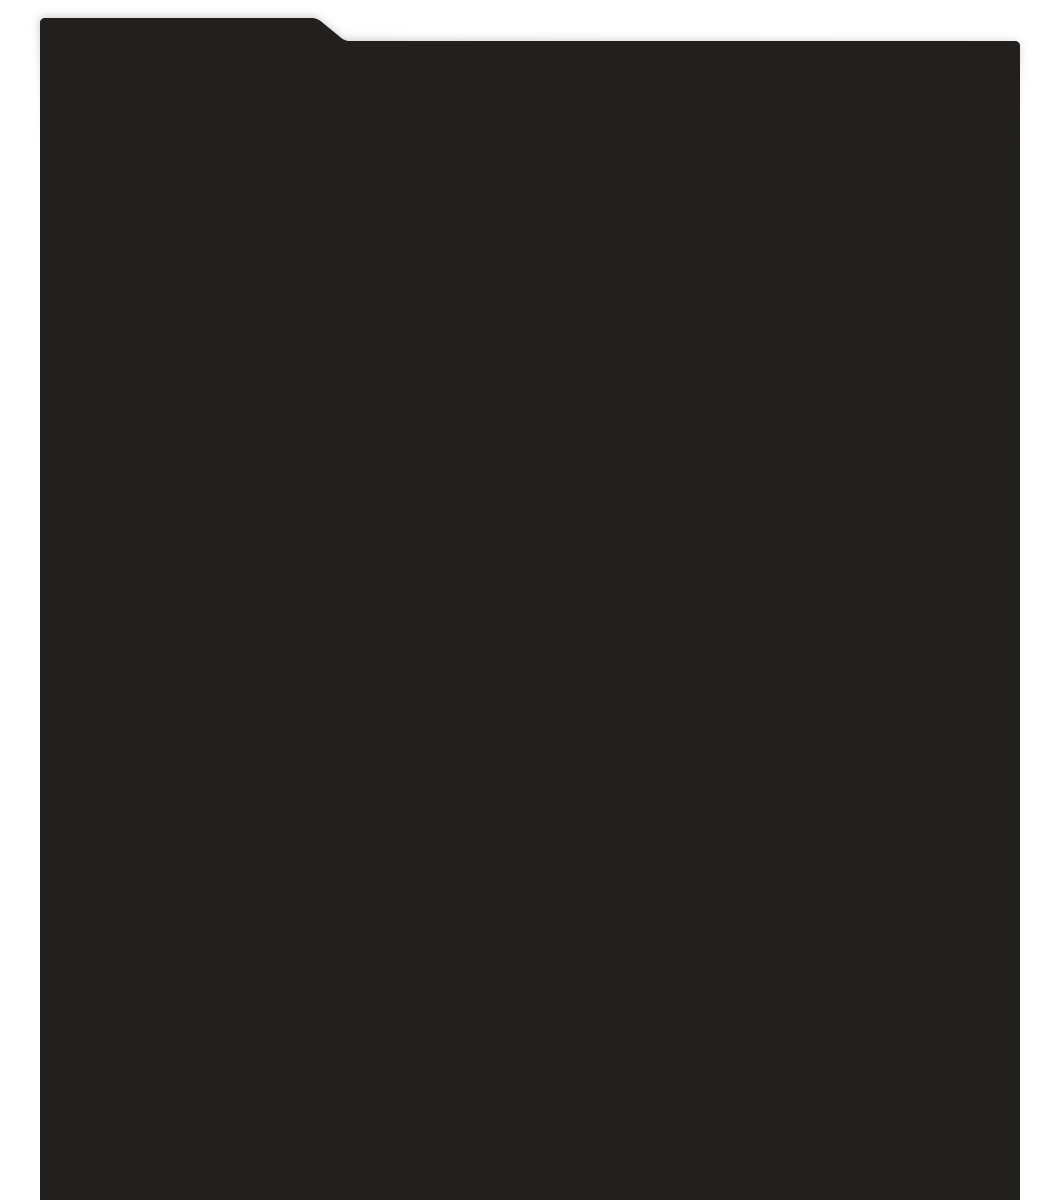
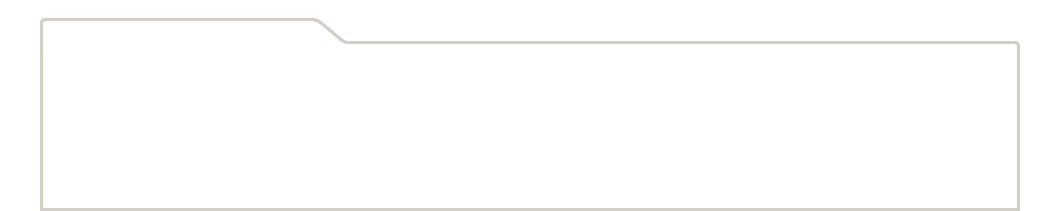
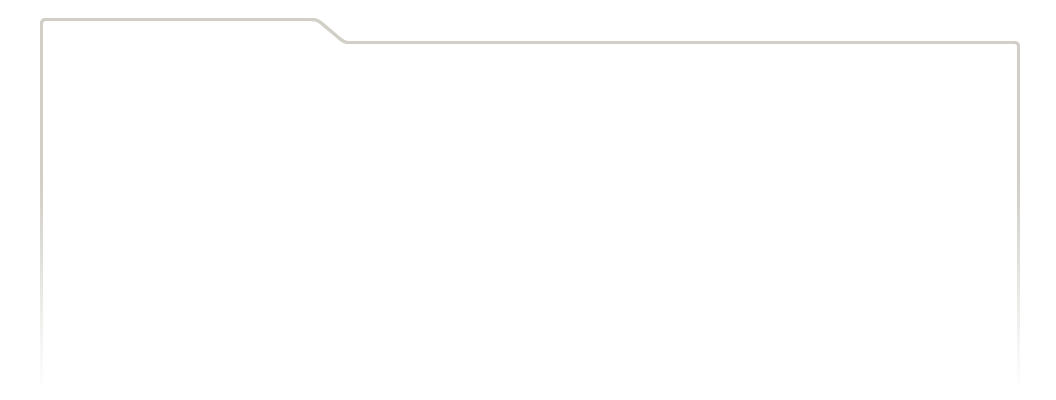
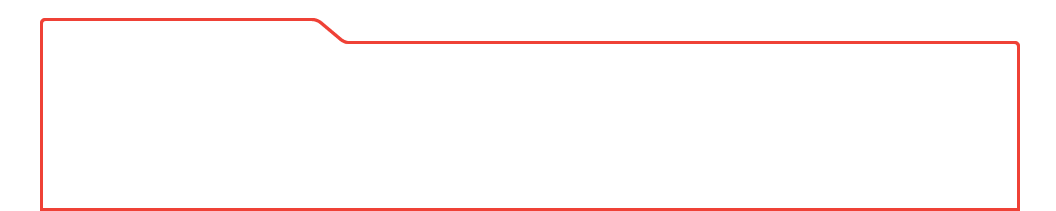
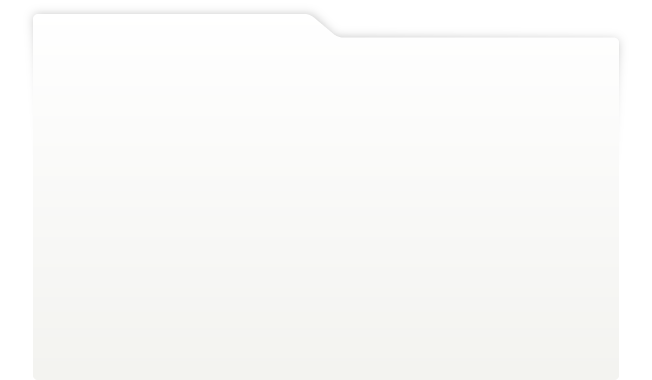
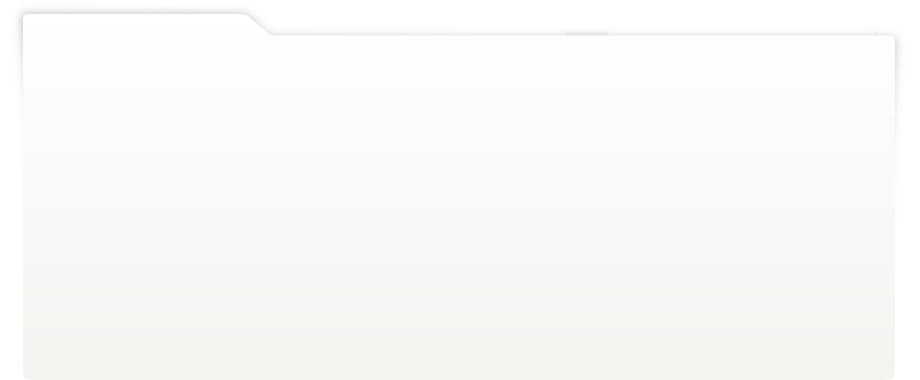
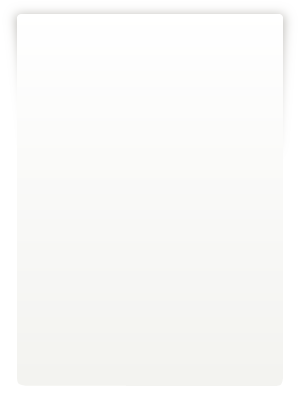
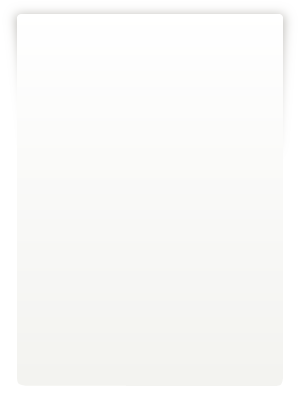
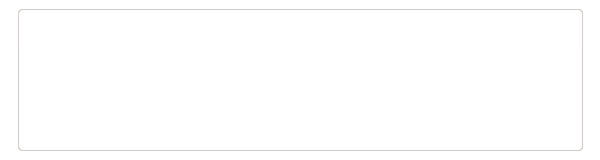
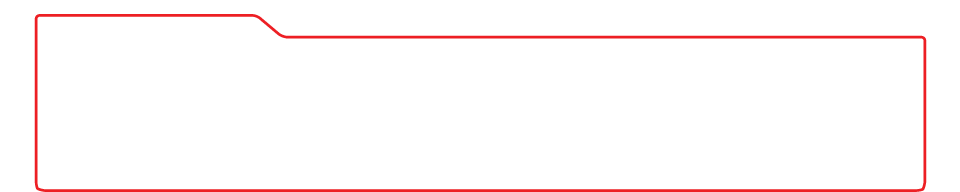
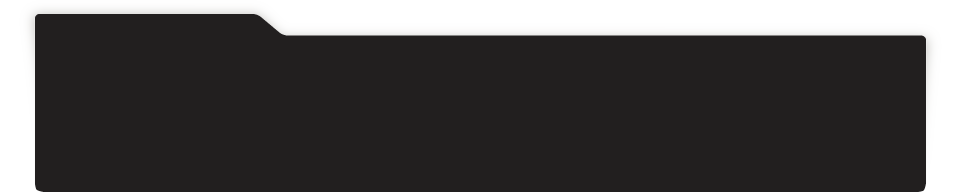
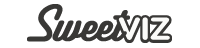
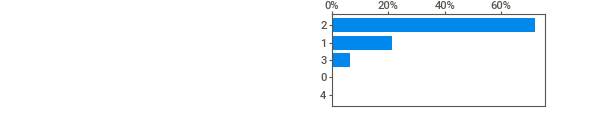
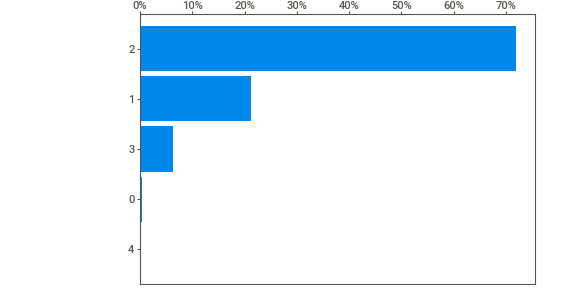
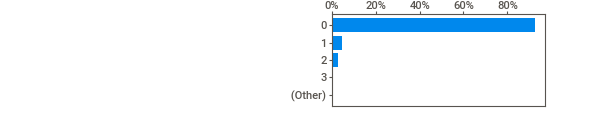
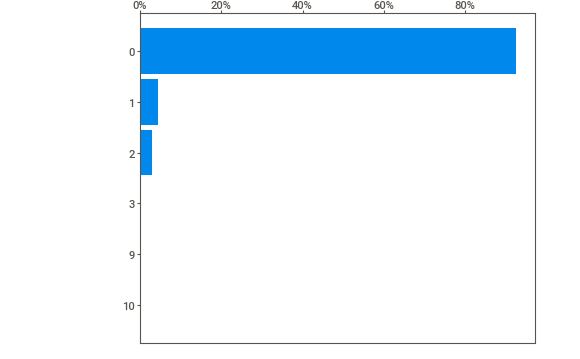
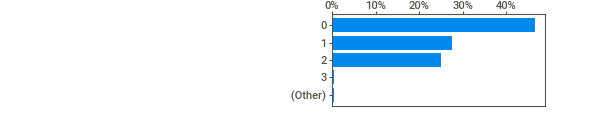
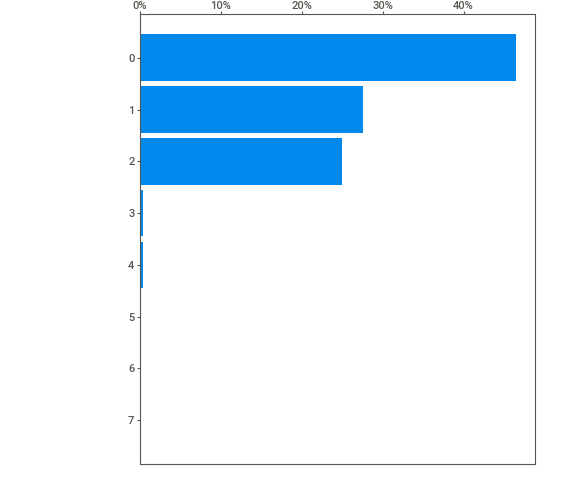
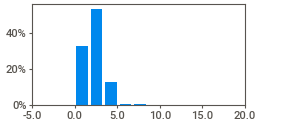
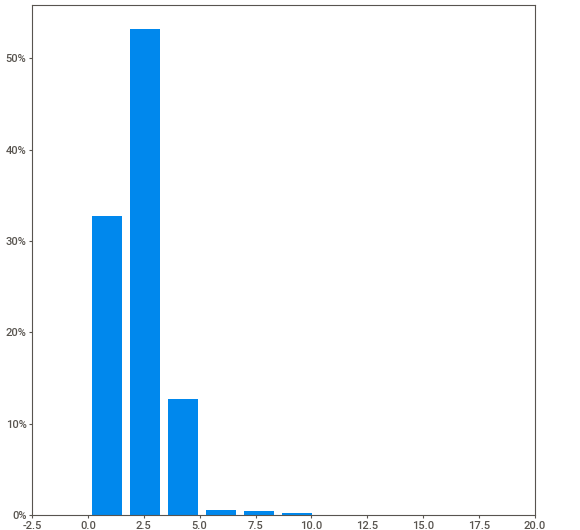
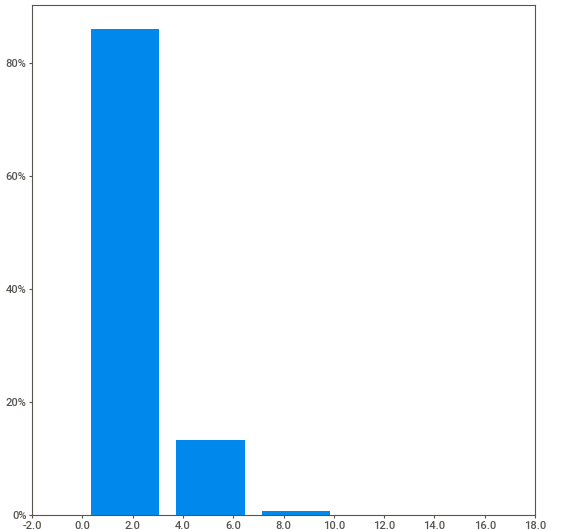
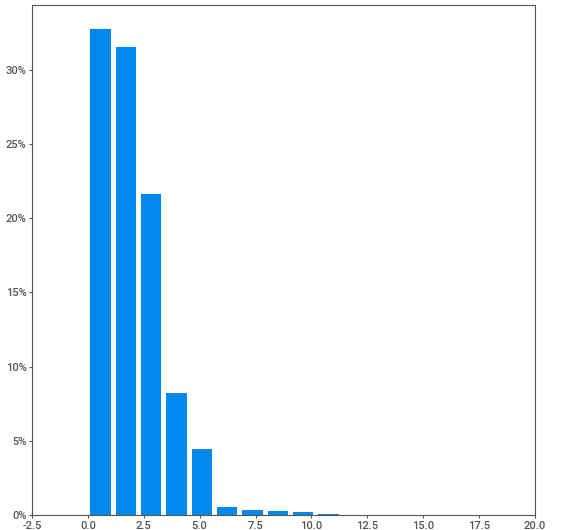
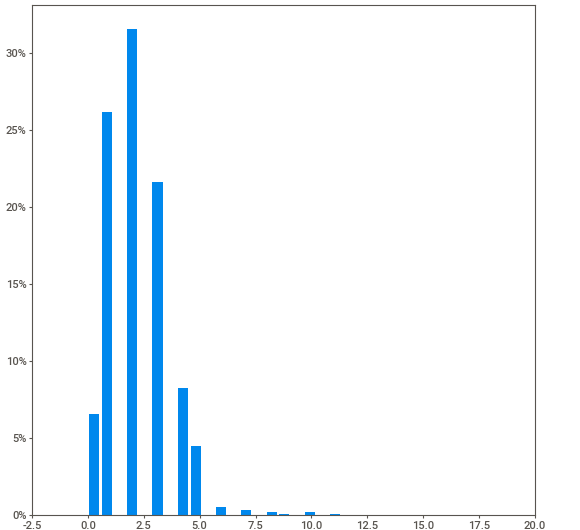
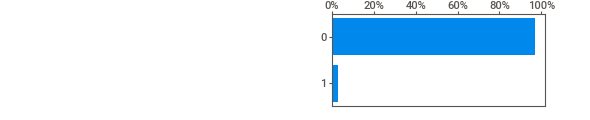
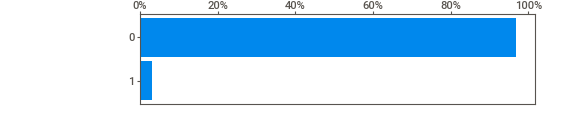
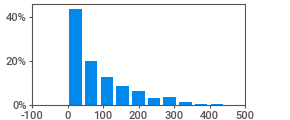
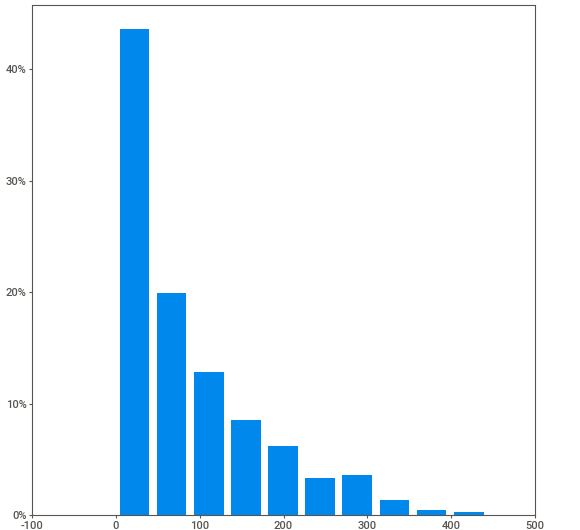
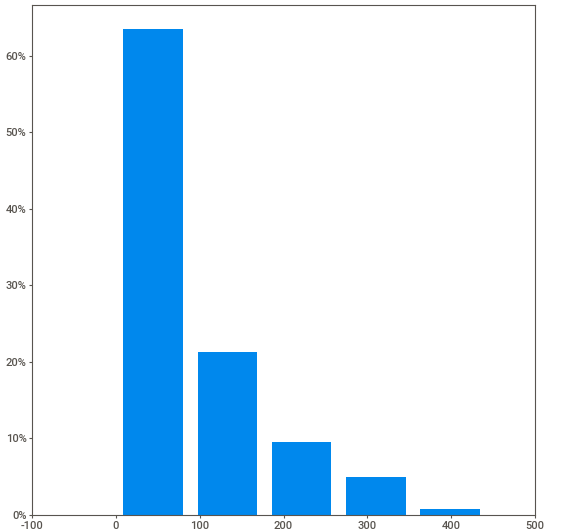
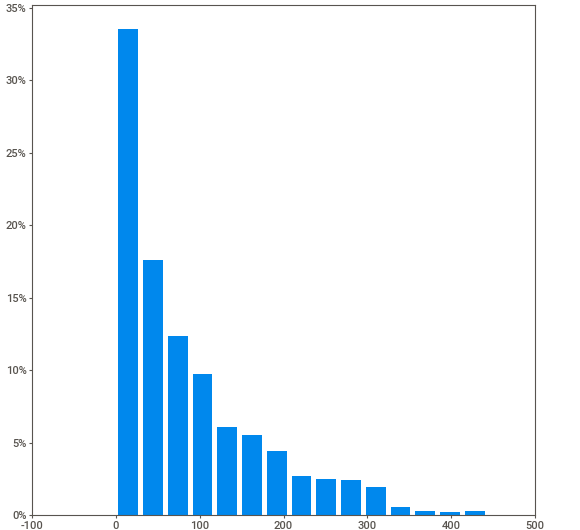
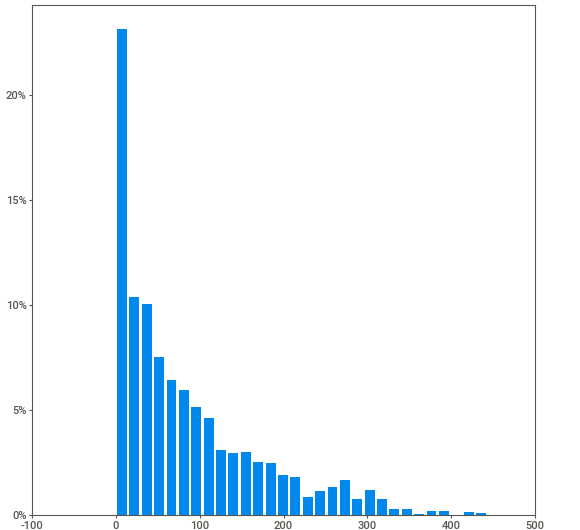
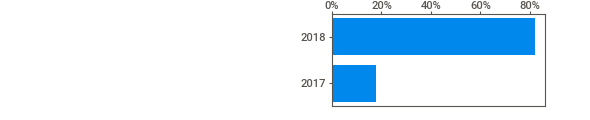
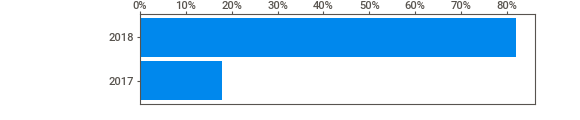
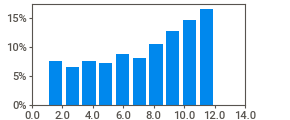
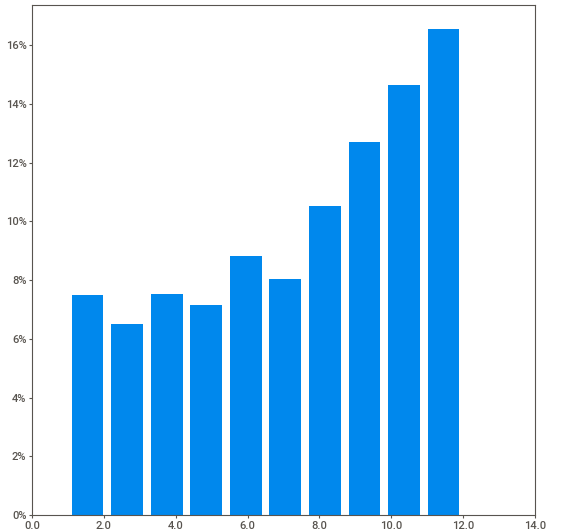
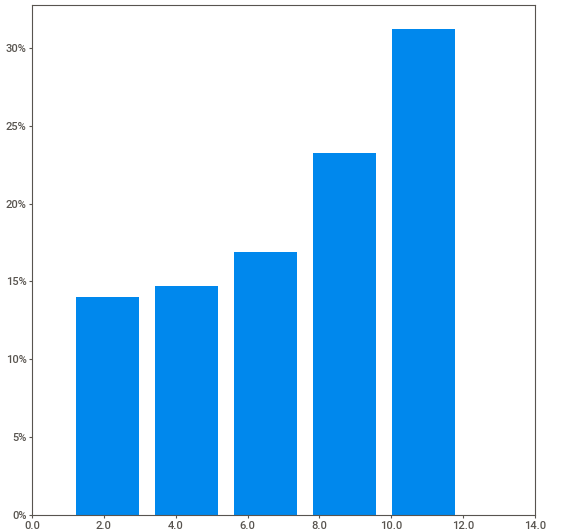
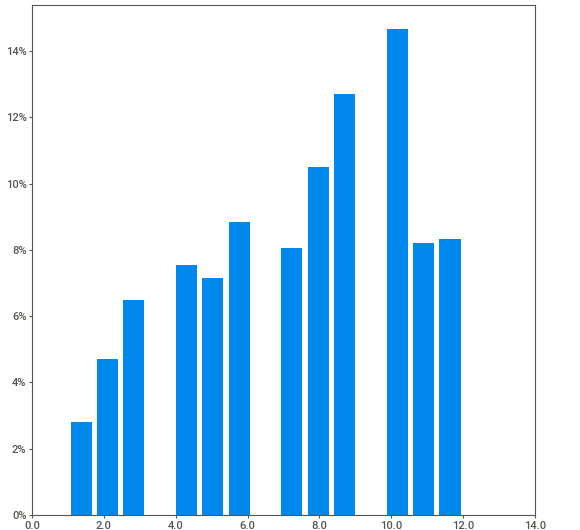
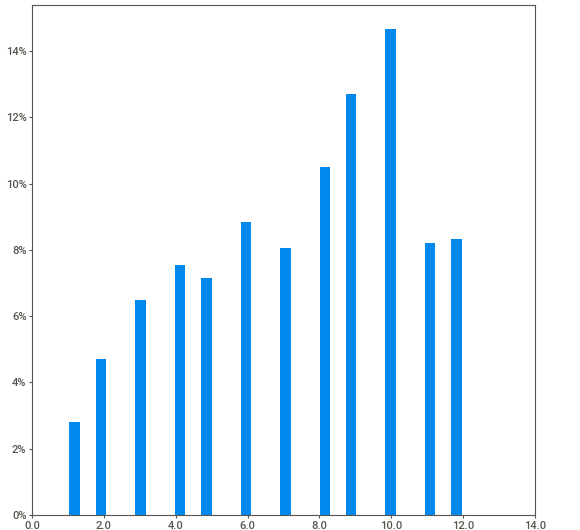
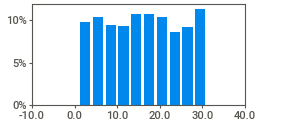
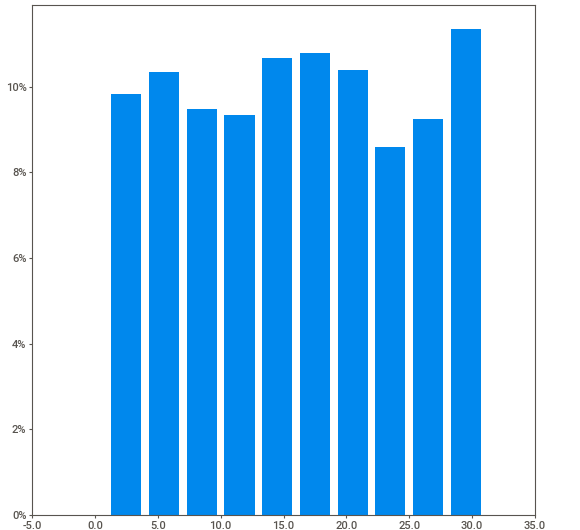
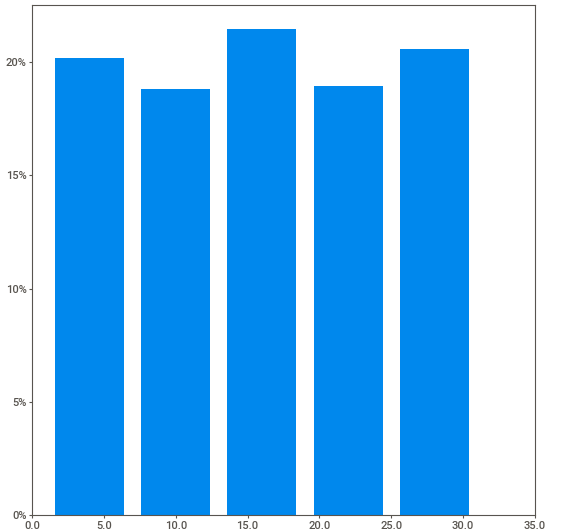
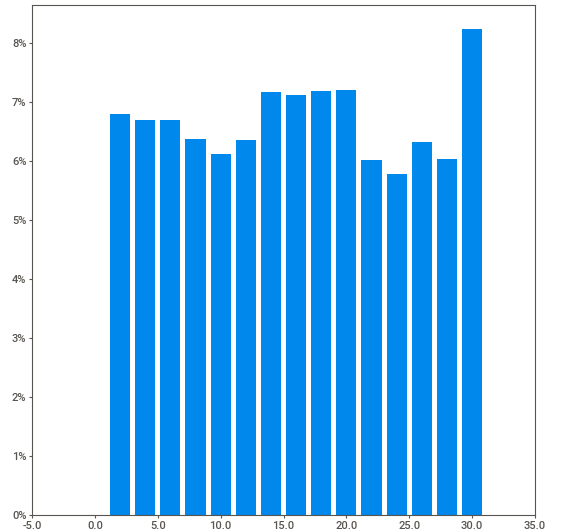
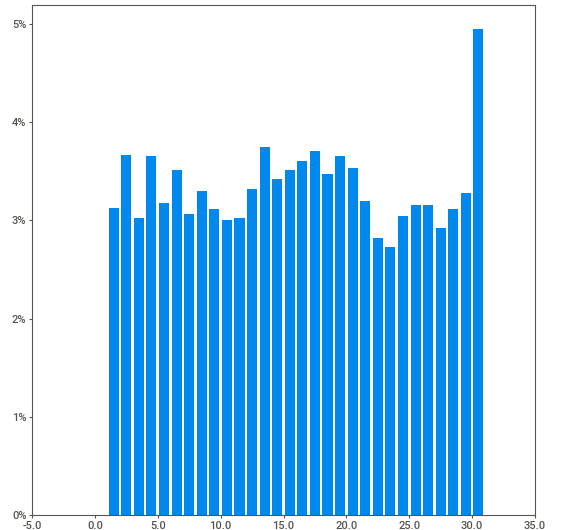
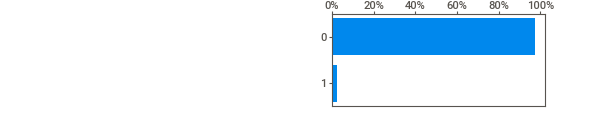
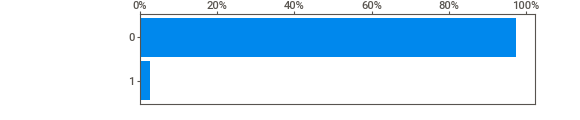
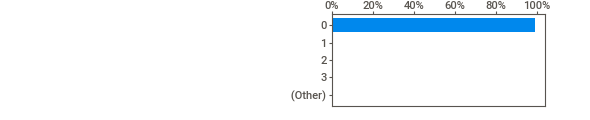
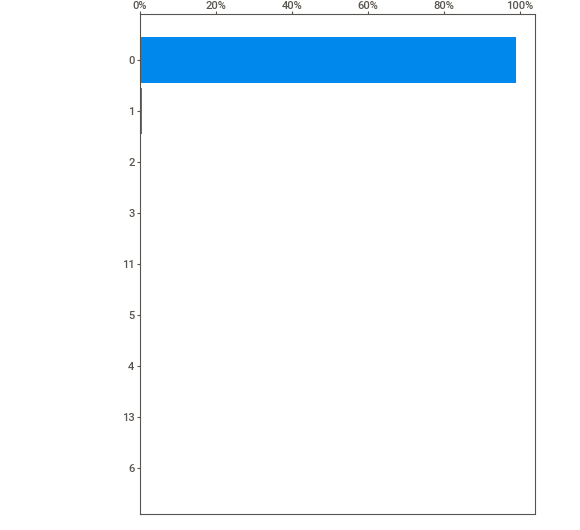
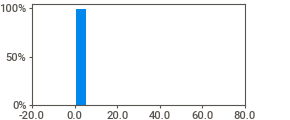
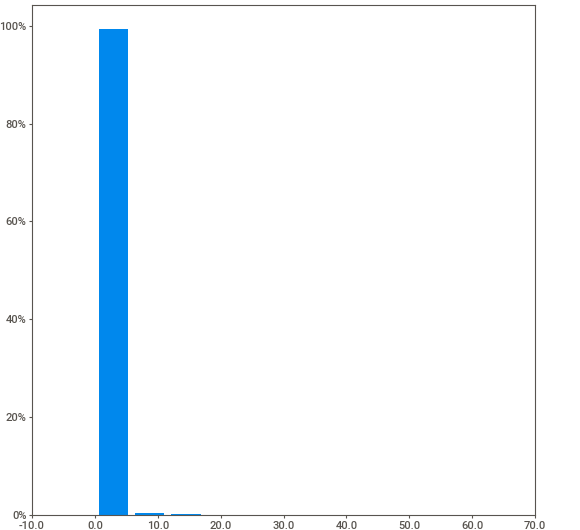
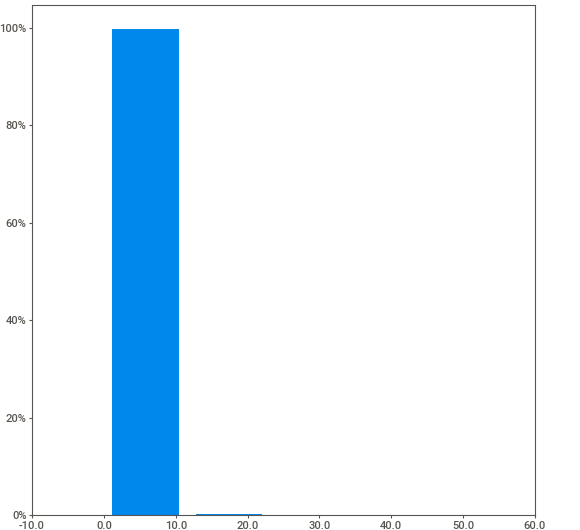
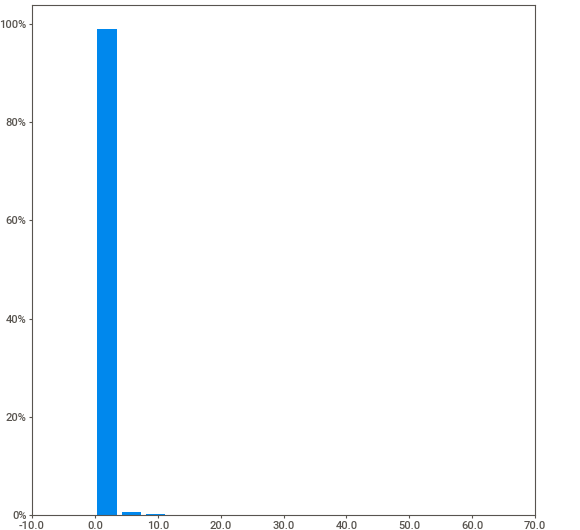
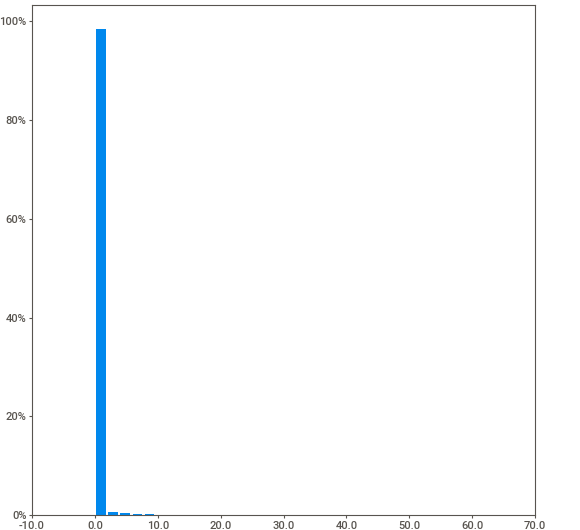
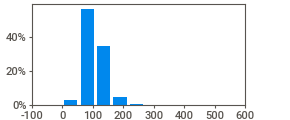
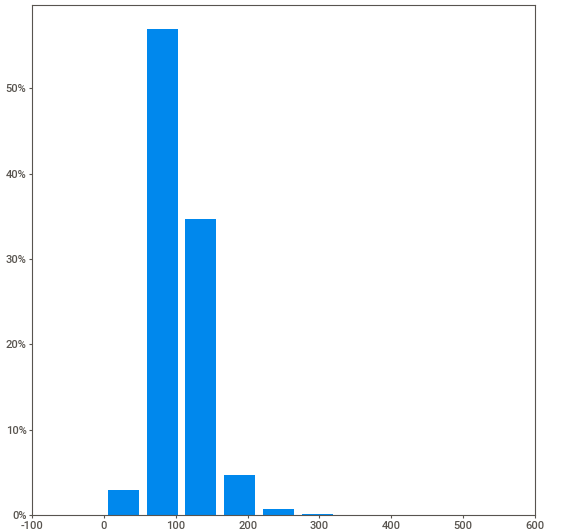
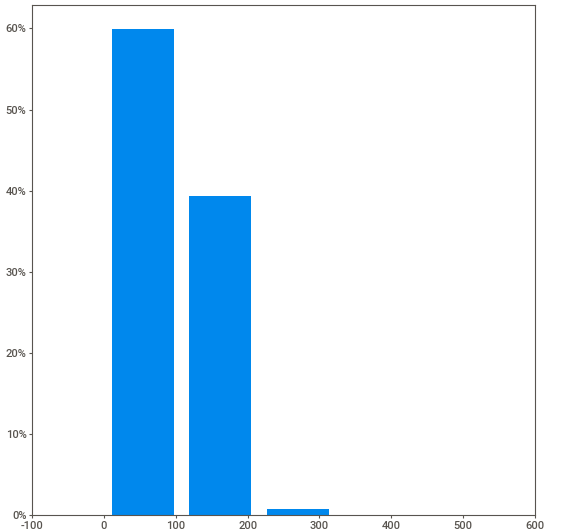
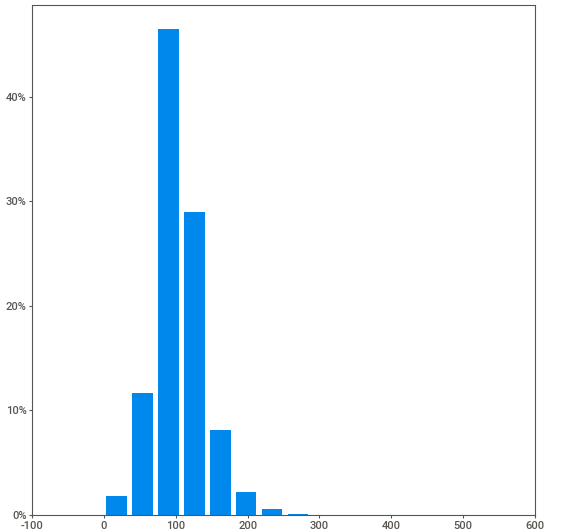
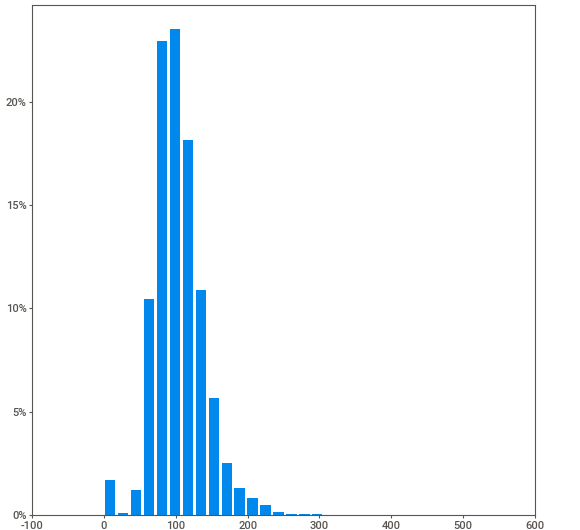
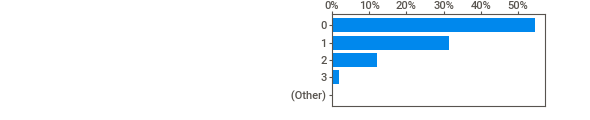
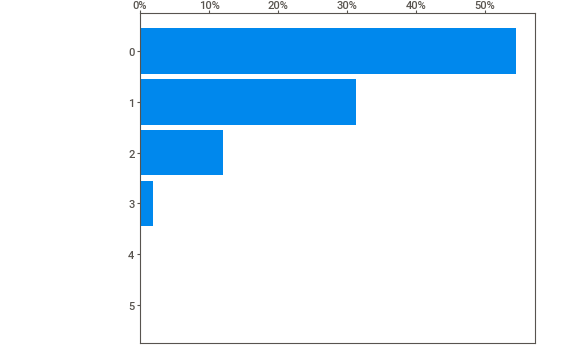
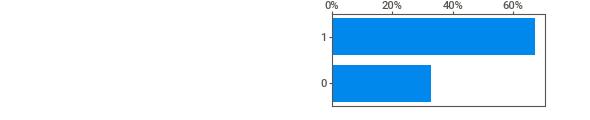
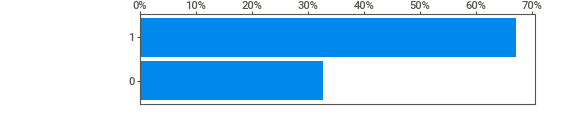
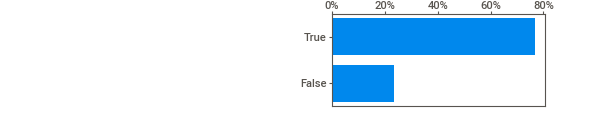
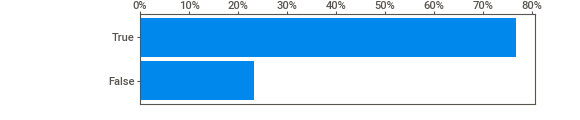
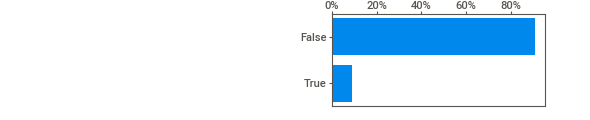
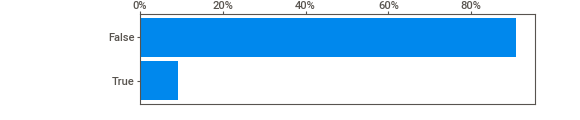
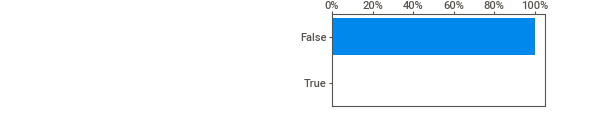
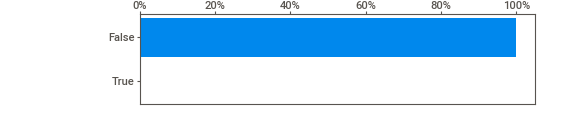
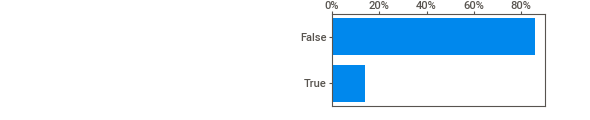
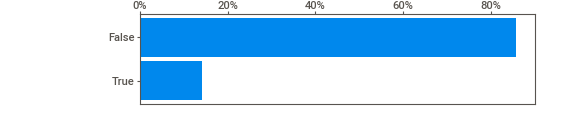
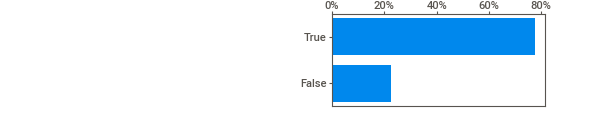
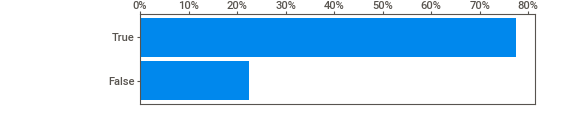
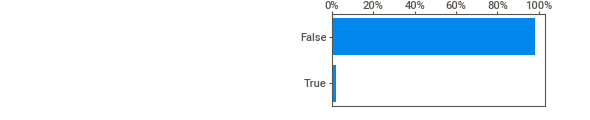
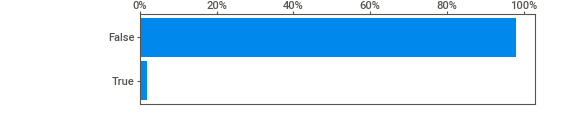
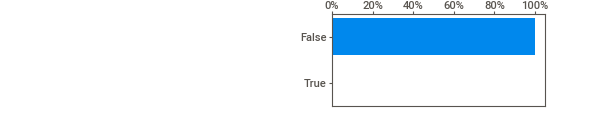
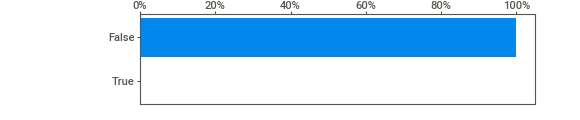
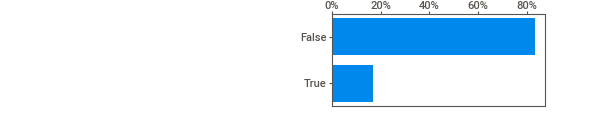
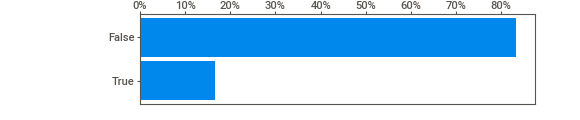
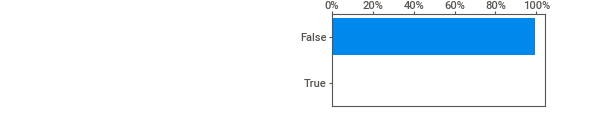
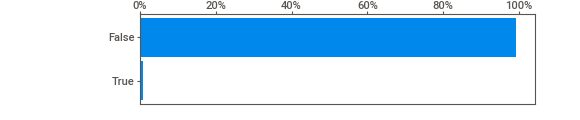
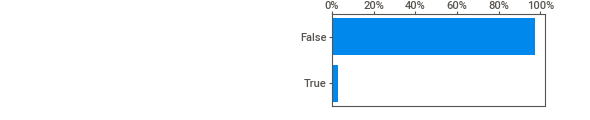
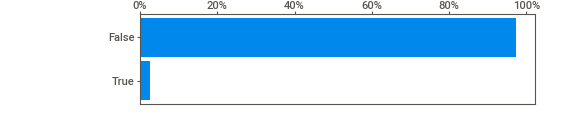
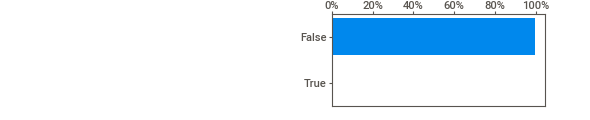
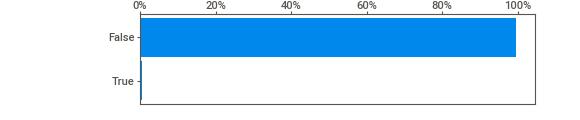
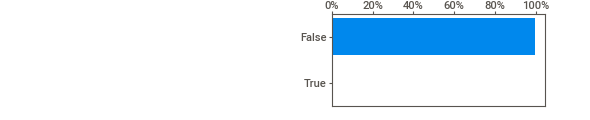
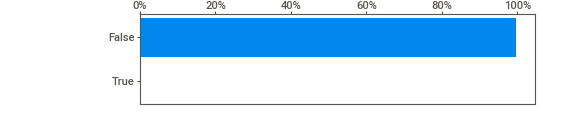
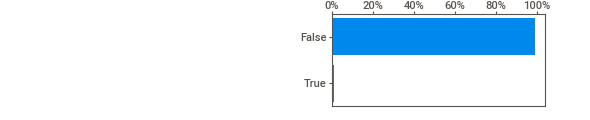
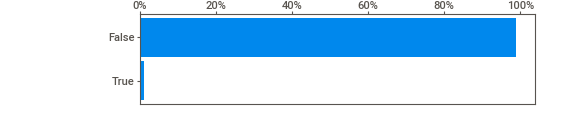
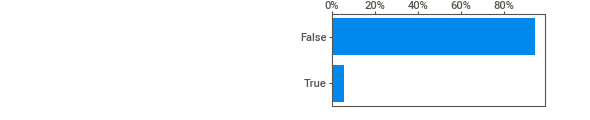
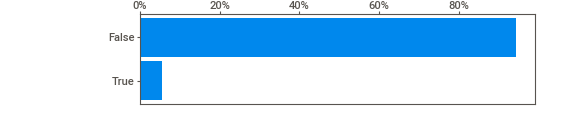
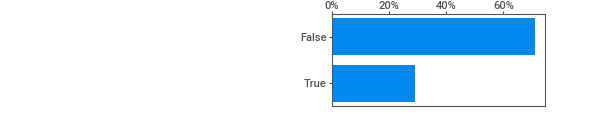
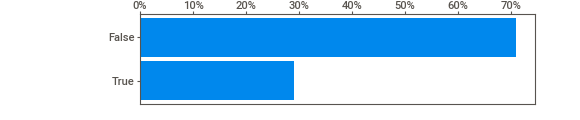
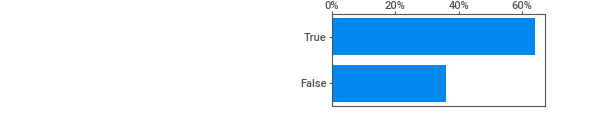
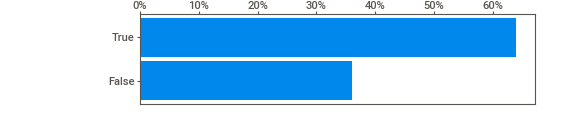
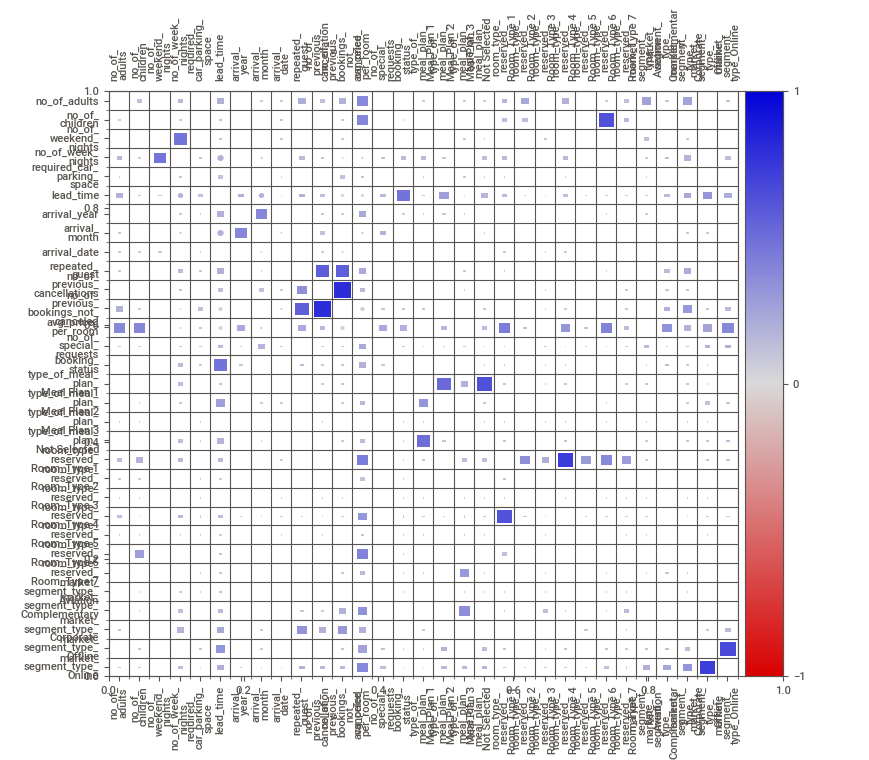
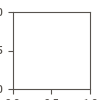

In [15]:
datareport.show_html(filepath='edaReport.html', layout='vertical')
datareport.show_notebook()

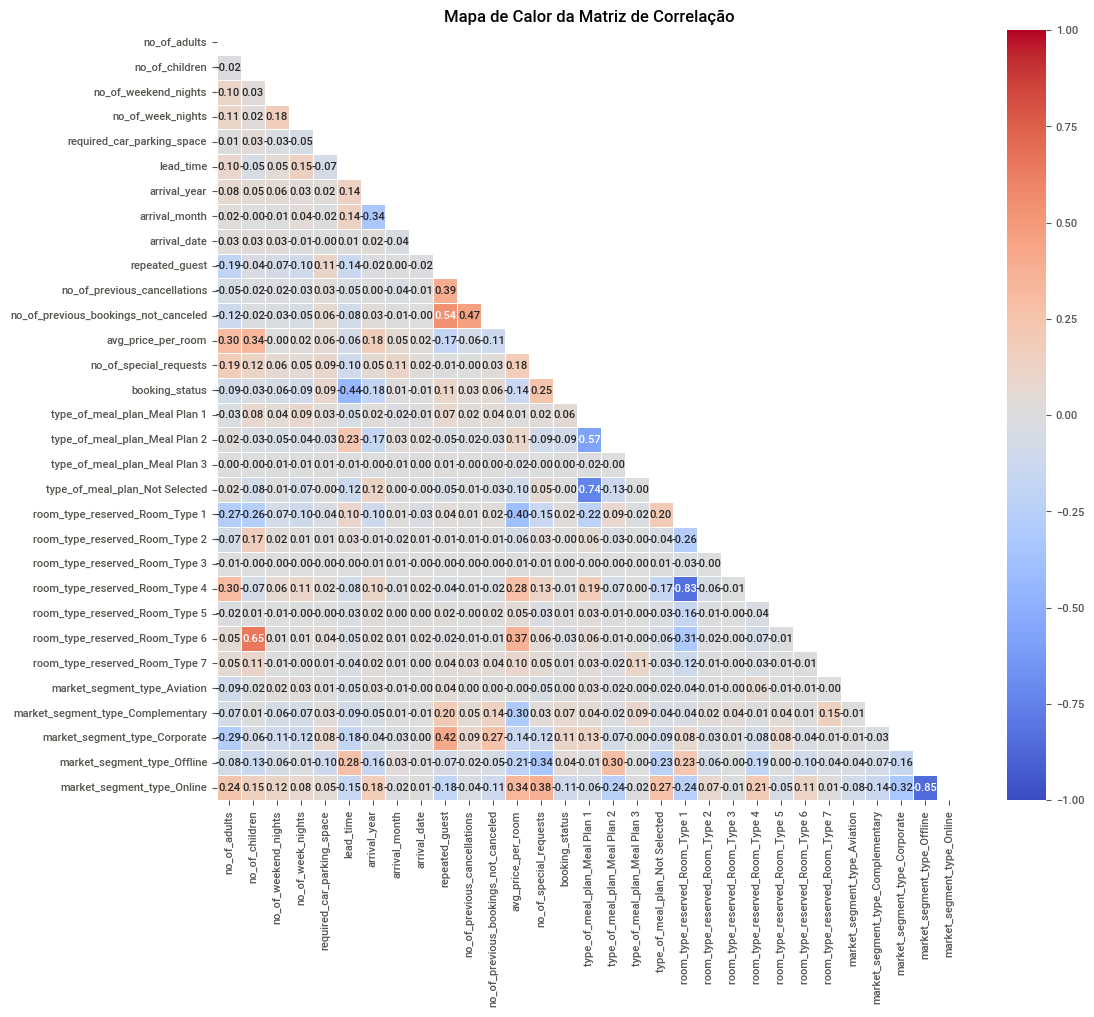

In [20]:
# Calcula a matriz de correlação
correlation_matrix = transformedDf.corr()

# Cria uma máscara para esconder o triângulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Cria um mapa de calor da matriz de correlação com a máscara
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask, annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

A partir daqui, vamos plotar gráficos para as análises multivariadas usando a bilbioteca plotly.

In [79]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [55]:
'''
Preço de quarto por mês
'''
chartDataframe = df.groupby(by=['arrival_month', 'room_type_reserved']).agg({'avg_price_per_room': 'mean'})
chartDataframe.reset_index(inplace=True, drop=False)
chartDataframeAll = df.groupby(by=['arrival_month']).agg({'avg_price_per_room': 'mean'})
chartDataframeAll.reset_index(inplace=True, drop=False)
fig = go.Figure()

for roomType in chartDataframe['room_type_reserved'].unique():
    fig.add_trace(
        go.Scatter(
            x=chartDataframe[chartDataframe['room_type_reserved'] == roomType]['arrival_month'], 
            y=chartDataframe[chartDataframe['room_type_reserved'] == roomType]['avg_price_per_room'], 
            mode='lines+markers',
            name=f'Preço Médio por Quarto - {roomType}'))

fig.add_trace(
    go.Bar(
        x=chartDataframeAll['arrival_month'], 
        y=chartDataframeAll['avg_price_per_room'], 
        # mode='lines+markers',
        name=f'Preço Médio por Quarto'))



# Configurações do layout
fig.update_layout(title='Preço Médio por Quarto ao Longo do Ano',
                  xaxis_title='Mês de Chegada',
                  yaxis_title='Preço Médio por Quarto',
                  template='plotly_white',
                  width = 900, 
                  height = 600)

# Exibindo o gráfico
fig.show()

In [86]:
'''
Mês do ano por número de crianças
'''
chartDataframe = df.groupby(by=['arrival_month']).agg({'no_of_children': ['mean', 'count']})
chartDataframe.reset_index(inplace=True, drop=False)

chartDataframe2 = df[df['no_of_children'] > 0].groupby(by=['arrival_month']).agg({'no_of_children': 'mean'})
chartDataframe2.reset_index(inplace=True, drop=False)
fig = make_subplots(specs=[[{"secondary_y": True}]])

chartDataframe
fig.add_trace(
    go.Bar(
        x=chartDataframe['arrival_month'], 
        y=chartDataframe['no_of_children']['mean'], 
        name=f'Quantidade média de crianças',
        ))
fig.add_trace(
    go.Scatter(
        x=chartDataframe['arrival_month'], 
        y=chartDataframe['no_of_children']['count'], 
        mode='lines+markers',
        name=f'# de reservas com crianças',
        ), secondary_y=True)
fig.add_trace(
    go.Scatter(
        x=chartDataframe2['arrival_month'], 
        y=chartDataframe2['no_of_children'], 
        mode='lines+markers',
        name=f'Quantidade média de crianças (Apenas das reservas com crianças)',
        ))



# Configurações do layout
fig.update_layout(title='Quantidade de Crianças por Mês',
                  xaxis_title='Mês de Chegada',
                  yaxis_title='Quantidade de Crianças',
                  template='plotly_white',
                  width = 1300, 
                  height = 600)

# Exibindo o gráfico
fig.show()

In [104]:
'''
Dias de reserva por numero de pessoas
'''
dfAux = df[['no_of_week_nights', 'no_of_weekend_nights', 'no_of_adults', 'no_of_children']]
dfAux['no_of_total_nights'] = dfAux['no_of_week_nights'] + df['no_of_weekend_nights']
dfAux['no_of_people'] = dfAux['no_of_adults'] + df['no_of_children']
chartDataframe = dfAux.groupby(by=['no_of_total_nights']).agg({'no_of_people': ['mean', 'count'], 'no_of_adults': 'mean', 'no_of_children': 'mean'})
chartDataframe.reset_index(inplace=True, drop=False)
chartDataframe
fig = make_subplots(specs=[[{"secondary_y": True}]])


chartDataframe
fig.add_trace(
    go.Bar(
        x=chartDataframe['no_of_total_nights'], 
        y=chartDataframe['no_of_people']['mean'], 
        # mode='lines+markers',
        name=f'Média de Pessoas',
        ))

fig.add_trace(
    go.Bar(
        x=chartDataframe['no_of_total_nights'], 
        y=chartDataframe['no_of_adults']['mean'], 
        # mode='lines+markers',
        name=f'Média de Adultos',
        ))

fig.add_trace(
    go.Bar(
        x=chartDataframe['no_of_total_nights'], 
        y=chartDataframe['no_of_children']['mean'], 
        # mode='lines+markers',
        name=f'Média de Crianças',
        ))


fig.add_trace(
    go.Scatter(
        x=chartDataframe['no_of_total_nights'], 
        y=chartDataframe['no_of_people']['count'], 
        mode='lines+markers',
        name=f'Quantidade de Reservas',
        line=dict(color='purple')
        ),
    secondary_y=True)



# Configurações do layout
fig.update_layout(title='Quantidade de diárias por quantidade de pessoas',
                  xaxis_title='Diárias',
                  yaxis_title='Pessoas',
                  template='plotly_white',
                  width = 1300, 
                  height = 600,
                  barmode='group',
                  legend=dict(orientation="h"),)

# Exibindo o gráfico
fig.show()

C:\Users\mcemi\AppData\Local\Temp\ipykernel_14432\2770725360.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mcemi\AppData\Local\Temp\ipykernel_14432\2770725360.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
'''
Lead Time por numero de pessoas
'''
dfAux = df[['lead_time', 'no_of_adults', 'no_of_children']]
dfAux['no_of_people'] = dfAux['no_of_adults'] + df['no_of_children']
chartDataframe = dfAux.groupby(by=['lead_time']).agg({'no_of_people': ['mean', 'count'], 'no_of_adults': 'mean', 'no_of_children': 'mean'})
chartDataframe.reset_index(inplace=True, drop=False)

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Bar(
        x=chartDataframe['lead_time'], 
        y=chartDataframe['no_of_people']['mean'], 
        # mode='lines+markers',
        name=f'Média de Pessoas',
        ))

fig.add_trace(
    go.Bar(
        x=chartDataframe['lead_time'], 
        y=chartDataframe['no_of_adults']['mean'], 
        # mode='lines+markers',
        name=f'Média de Adultos',
        ))

fig.add_trace(
    go.Bar(
        x=chartDataframe['lead_time'], 
        y=chartDataframe['no_of_children']['mean'], 
        # mode='lines+markers',
        name=f'Média de Crianças',
        ))


fig.add_trace(
    go.Scatter(
        x=chartDataframe['lead_time'], 
        y=chartDataframe['no_of_people']['count'], 
        mode='lines+markers',
        name=f'Quantidade de Reservas',
        line=dict(color='purple')
        ),
    secondary_y=True)



# Configurações do layout
fig.update_layout(title='Lead Time por quantidade de pessoas',
                  xaxis_title='Lead Time',
                  yaxis_title='Pessoas',
                  template='plotly_white',
                  width = 1300, 
                  height = 600,
                  barmode='group',
                  legend=dict(orientation="h"),)

# Exibindo o gráfico
fig.show()

C:\Users\mcemi\AppData\Local\Temp\ipykernel_14432\3871181593.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
chartDataframe[chartDataframe['lead_time'] <= 45]['no_of_people']['count'].sum() / chartDataframe['no_of_people']['count'].sum()

0.44068917987594763

In [119]:
'''
Lead Time por Canal
'''
chartDataframe = df.groupby(by=['market_segment_type']).agg({'lead_time': 'mean', 'avg_price_per_room': 'mean'})
chartDataframe.reset_index(inplace=True, drop=False)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=chartDataframe['market_segment_type'], 
        y=chartDataframe['lead_time'], 
        # mode='lines+markers',
        name=f'Média de Lead Time',
        ))

fig.add_trace(
    go.Scatter(
        x=chartDataframe['market_segment_type'], 
        y=chartDataframe['avg_price_per_room'], 
        mode='lines+markers',
        name=f'Preço médio por quarto',
        line=dict(color='purple')
        ),
    secondary_y=True)


# Configurações do layout
fig.update_layout(title='Lead Time por Canal',
                  xaxis_title='Canal de Marketing',
                  yaxis_title='Média de Lead Time',
                  template='plotly_white',
                  width = 1300, 
                  height = 600,
                  legend=dict(orientation="h"),)
# fig.update_yaxes(
#     title_text="<b>primary</b> yaxis title", 
#     secondary_y=False)
fig.update_yaxes(
    title_text="Preço médio por quarto", 
    secondary_y=True)

# Exibindo o gráfico
fig.show()

## PCA

Primeiro, vamos criar datsets de features e de targets:

In [120]:
features = transformedDf.drop(columns=['booking_status'])
target = pd.DataFrame(transformedDf['booking_status'])

Depois, vamos dividir o dataset entre treino e teste, usando a função `train_test_split` da bilbioteca _Scikit-learn_

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

aplicando `PCA` com _Scikit-learn_

In [125]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
explained_var = np.cumsum(pca.explained_variance_ratio_)
explained_var

array([0.84813006, 0.98920038, 0.99798434, 0.99904076, 0.99942084,
       0.9996452 , 0.9997335 , 0.99980664, 0.99984377, 0.99987875,
       0.9999087 , 0.99992782, 0.99994496, 0.99995894, 0.99997153,
       0.9999794 , 0.9999866 , 0.99999   , 0.99999315, 0.99999511,
       0.99999668, 0.99999803, 0.99999898, 0.99999952, 0.99999997,
       0.99999999, 1.        , 1.        , 1.        , 1.        ])

A variável "explained_var" calcula a soma cumulativa de todos os componentes em ordem decrescente até chegarmos a um. Podemos usar isso para entender quantos componentes principais precisamos para explicar a variância nos dados, aumentando assim a precisão do nosso modelo.

In [130]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = np.arange(len(explained_var)),
        y=explained_var,
        mode='markers+lines'
    )
)

fig.update_layout(title='Variância explicada por componente',
                  xaxis_title='Numero de Componentes',
                  yaxis_title='Variancia',
                  template='plotly_white',
                  width = 900, 
                  height = 500,
                  legend=dict(orientation="h"),)

fig.show()

A quantidade de variância explicada como função dos componentes é uma função crescente, embora aumente muito levemente. Poucos componentes podem nos levar a um modelo bastante interessante, segundo essa análise.

Para descobrir quais são os componentes principais, vamos fazer um gráfico de importância de características atribuindo pesos a eles.

In [142]:
pca = PCA()
pca.fit_transform(X_train)
pca_best_components = pd.DataFrame(pca.components_, columns=X_train.columns).T
pca_best_components['mean_weight'] = pca_best_components.iloc[:].abs().mean(axis=1)
pca_best_components = pca_best_components[['mean_weight']]
pca_best_components.sort_values('mean_weight', ascending=False, inplace=True)

In [145]:
fig=go.Figure()
fig.add_trace(
    go.Bar(
        x=pca_best_components.index,
        y = pca_best_components['mean_weight']
    )
)

fig.update_layout(title='Peso da feature na variância',
                  xaxis_title='Feature',
                  yaxis_title='Peso',
                  template='plotly_white',
                  width = 1300, 
                  height = 600,
                  legend=dict(orientation="h"),)